## GENERADORES DE GRÁFICAS ALEATORIAS

In [4]:
library(igraph)
library("readxl")
library(ggplot2)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [5]:
## RUTA DE LOS ARCHIVOS
ruta<-"/home/diego/Documentos/PiedrasTDA/"

## Obtiene los nombres de los archivos en la ruta especificada

archivos=list.files(path = ruta, pattern = "Matriz", all.files = FALSE,
             full.names = FALSE, recursive = FALSE,
             ignore.case = FALSE, include.dirs = FALSE, no.. = FALSE)

##CARGA TODO LOS ARCHIVOS
archivos=purrr::discard(archivos,.p = ~stringr::str_detect(.x,"MatrizAdyacencia_MuestraDeMano.xlsx"))

#Recupera las Matrices de los archivos junto con sus nombres  
matrices=list() #lista de matrices y nombres
for(i in 1:length(archivos)){  #itera para cada archivo
    df<-read_excel(paste(ruta,archivos[i],sep=""),col_names=FALSE) #lee el excel 
    aux=list(df,archivos[i]) #lo convierte la matriz a lista
    matrices[[i]]<-aux #la ingresa a la lista de matrices
}

In [6]:
energy1<-function(matrix){
    lista<-eigen(matrix)[[1]]
    total<-0
    for(i in 1:length(lista)){
        total<-total+abs(lista[[i]])
    }
    return(total)
}


#GRADO PROMEDIO
grado_prom<-function(matriz){
    tot=0
    n=length(matriz)
    for(i in 1:n){
        tot<-tot+sum(matriz[[i]])
    }
        return(tot/n)
}


#GRADO PROMEDIO
grado_prom2<-function(matrix){
    n<-length(matrix)/2
    sum<-0
    for(i in 1:length(matrix)){
        sum=sum+matrix[[i]]
    }
    return(sum/n)
}


In [7]:
ENERGY<-c()
NUM<-c()
GRADO<-c()
for (i in 1:length(matrices)){
    ENERGY[[i]]<-energy1(matrices[[i]][[1]])
    NUM[[i]]<-length(matrices[[i]][[1]])
    GRADO[[i]]<-grado_prom(matrices[[i]][[1]])
    cat(ENERGY[[i]],NUM[[i]],GRADO[[i]],matrices[[i]][[2]],"\n")
    }

165.2809 147 2.054422 MatrizAdyacencia_Fractura_(105).xlsx 
84.23375 80 1.85 MatrizAdyacencia_Fractura_(107).xlsx 
131.4662 125 1.904 MatrizAdyacencia_Fractura_(108).xlsx 
96.54088 86 2.046512 MatrizAdyacencia_Fractura_(22).xlsx 
62.81796 58 1.896552 MatrizAdyacencia_Fractura_(23).xlsx 
94.80823 86 2 MatrizAdyacencia_Fractura_(27).xlsx 
78.16044 71 1.943662 MatrizAdyacencia_Fractura_(28).xlsx 
139.1006 113 2.247788 MatrizAdyacencia_Fractura_(31).xlsx 
57.34826 53 1.924528 MatrizAdyacencia_Fractura_(40).xlsx 
106.7013 92 2.043478 MatrizAdyacencia_Fractura_(52).xlsx 
64.51086 63 1.746032 MatrizAdyacencia_Fractura_(60).xlsx 
197.6921 178 1.910112 MatrizAdyacencia_Fractura_(62).xlsx 
65.61276 58 2.034483 MatrizAdyacencia_Fractura_(67).xlsx 
243.364 227 1.837004 MatrizAdyacencia_Fractura_(70).xlsx 
76.42663 75 1.733333 MatrizAdyacencia_Fractura_(72).xlsx 
89.23464 90 1.711111 MatrizAdyacencia_Fractura_(75).xlsx 
73.22898 70 1.742857 MatrizAdyacencia_Fractura_(78).xlsx 
72.06734 67 1.835821 

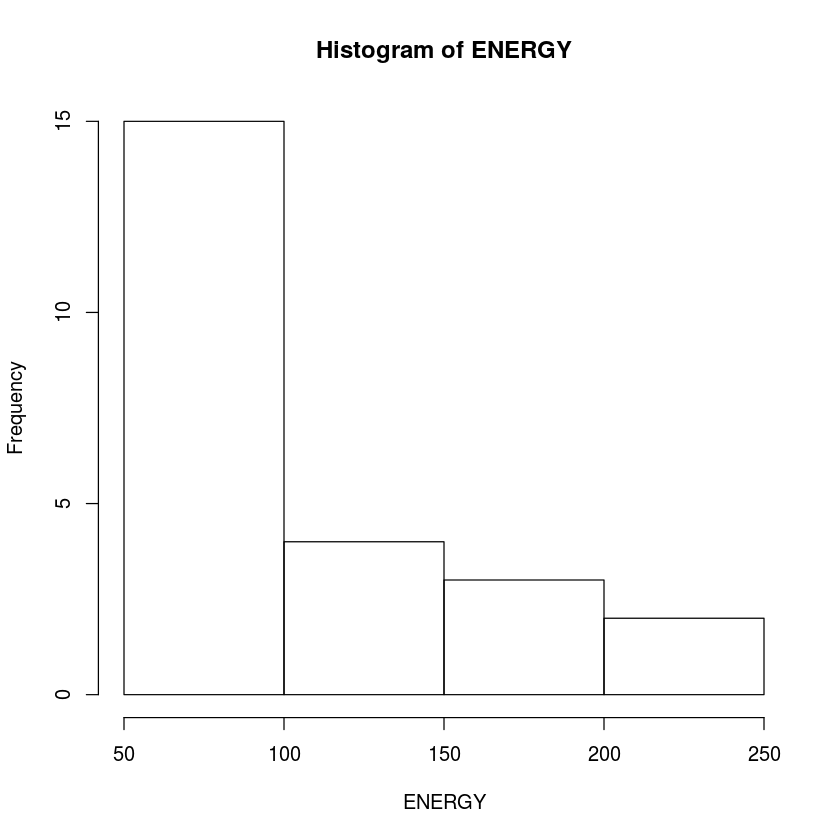

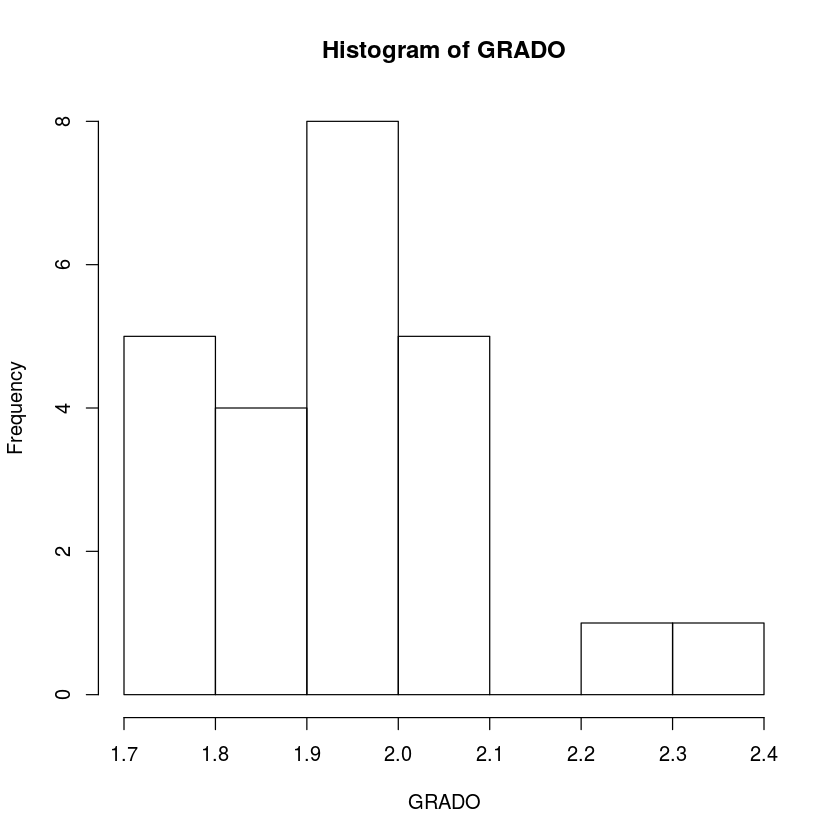

In [8]:

hist(ENERGY)
hist(GRADO)

In [9]:
#CREA UN DATAFRAME
df<-data.frame(NUM,ENERGY,GRADO)
#help(predict)
cor(df$ENERGY,df$NUM)
cor(df$GRADO,df$NUM)

[1] 0.9929476

[1] 0.172514

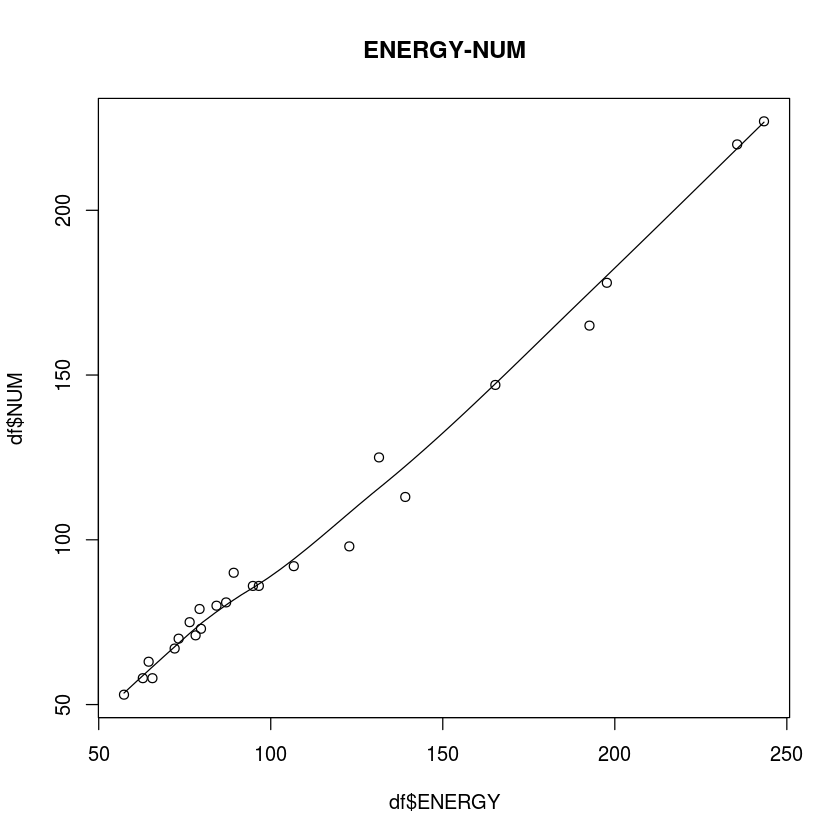

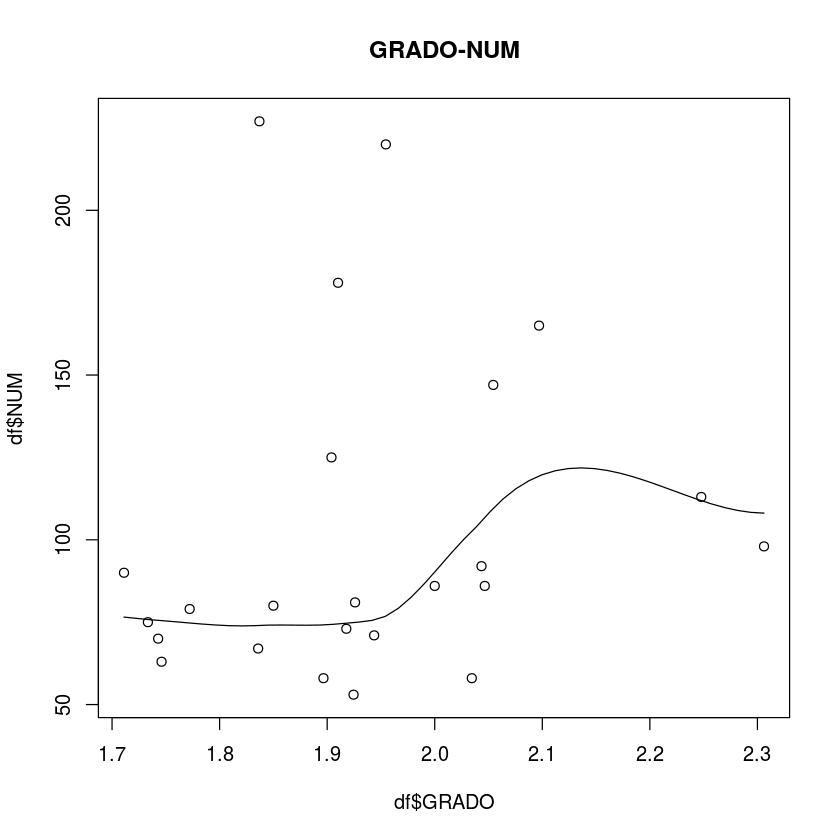

In [10]:
scatter.smooth(x=df$ENERGY,y=df$NUM,main="ENERGY-NUM")
scatter.smooth(x=df$GRADO,y=df$NUM,main="GRADO-NUM")

In [11]:
#CREA LA REGRESIÖN LINEAL
linear<-lm(NUM~ENERGY,data=df)
summary(linear)


Call:
lm(formula = NUM ~ ENERGY, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.6692  -2.2956  -0.1745   3.6965   8.3003 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.10319    2.83114   0.743    0.465    
ENERGY       0.89199    0.02271  39.284   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.022 on 22 degrees of freedom
Multiple R-squared:  0.9859,	Adjusted R-squared:  0.9853 
F-statistic:  1543 on 1 and 22 DF,  p-value: < 2.2e-16


# Funciones

In [12]:
#GENERADOR DE GRÁFICAS CON ALEATORIEDAD DADA LA ENERGÍA
#REGRESA UNA GRÁFICA CON UNA ENERGÍA CERCANA AL PARÁMETRO
generator_e<-function(energia){
    new<-data.frame(ENERGY=energia) #CREA DATAFRAME SOLAMENTE CON LA ENERGIA
    n<-as.integer(predict(linear,new)) #REGRESION QUE PREDICE EL NUMERO DE VERTICES DADA LA ENERGÍA
    gra<-make_empty_graph(directed=FALSE) #Crea la gráfica vacia
    gra<-add.vertices(gra,n) #Agrega los vertices
    energ<-0 #Variable auxiliar
    flag<-FALSE
    flag1<-FALSE
    while (flag==FALSE){
        for(i in 1:n){
            v<-sample(1:n,1)
            r<-rbinom(1,1,0.9) #Probabilidad de obtener un 1
            if (r==1 && are.connected(gra, i, v)==FALSE){
                gra<-add.edges(gra,c(i,v)) #Agrega una arista en los vertices i,j            
            }
            d<-get.adjacency(gra)      #Recupera la matriz de adyacencia
            f=as.matrix(d)
            f<-as.data.frame(f)
            energ<-energy1(f)
            if (energ>energia){
                flag1<-TRUE
                break
            }
        }
        if (flag1==TRUE){
            flag<-TRUE
            }
    }
    #plot.igraph(gra,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA)
    return(f)
}

##RECIBE EL GRADO PROMEDIO Y EL NÚMERO DE NODOS
generator_g<-function(grado_p,n){
    gra<-make_empty_graph(directed=FALSE) #Crea la gráfica vacia
    gra<-add.vertices(gra,n) #Agrega los vertices
    grado<-0
    flag<-FALSE
    while(flag==FALSE){
        for(i in 1:n){
            v<-sample(1:n,1)
            r<-rbinom(1,1,0.9)
            if (r==1 && are.connected(gra, i, v)==FALSE){
                gra<-add.edges(gra,c(i,v)) #Agrega una arista en los vertices i,j            
            }
            d<-get.adjacency(gra)      #Recupera la matriz de adyacencia
            f=as.matrix(d)
            f<-as.data.frame(f)
            grad<-grado_prom(f)
            if(grad>grado_p){
                flag<-TRUE
                break
            }
        }    
    }
    #plot.igraph(gra,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA)
    return(f)
}




In [13]:
a<-generator_e(147)
grado_prom(a)


[1] 1.909774

## GRÁFICAS CON ENERGÍA <= 100

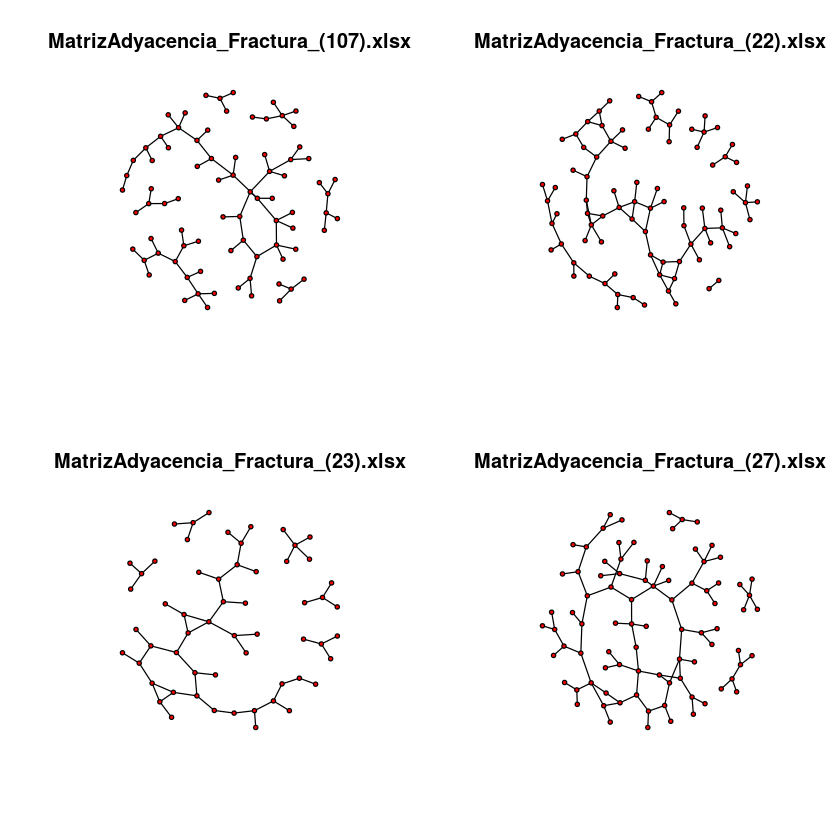

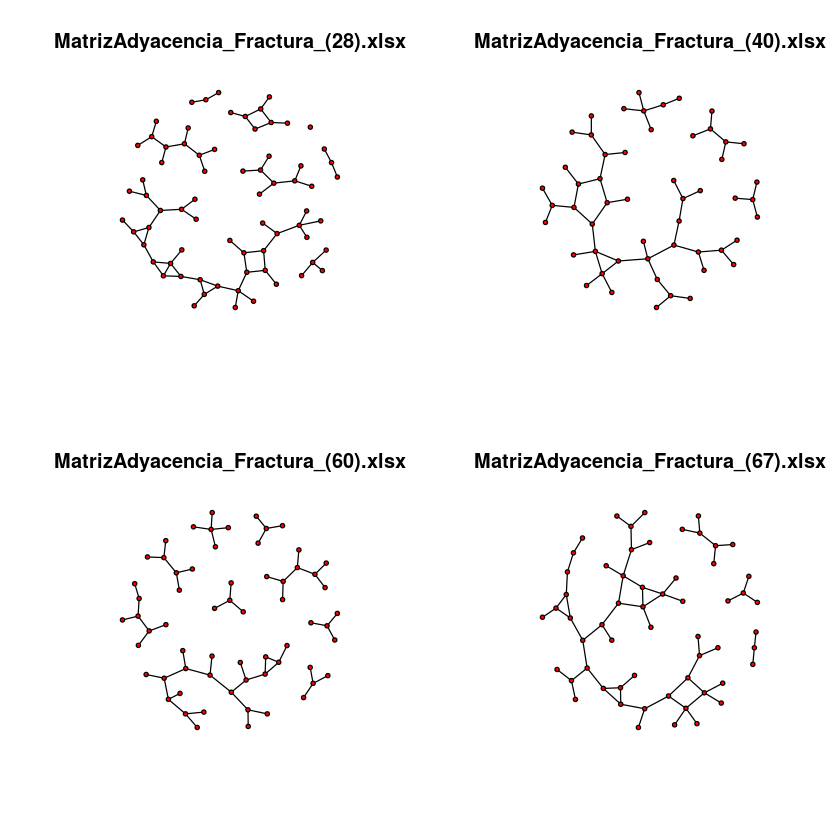

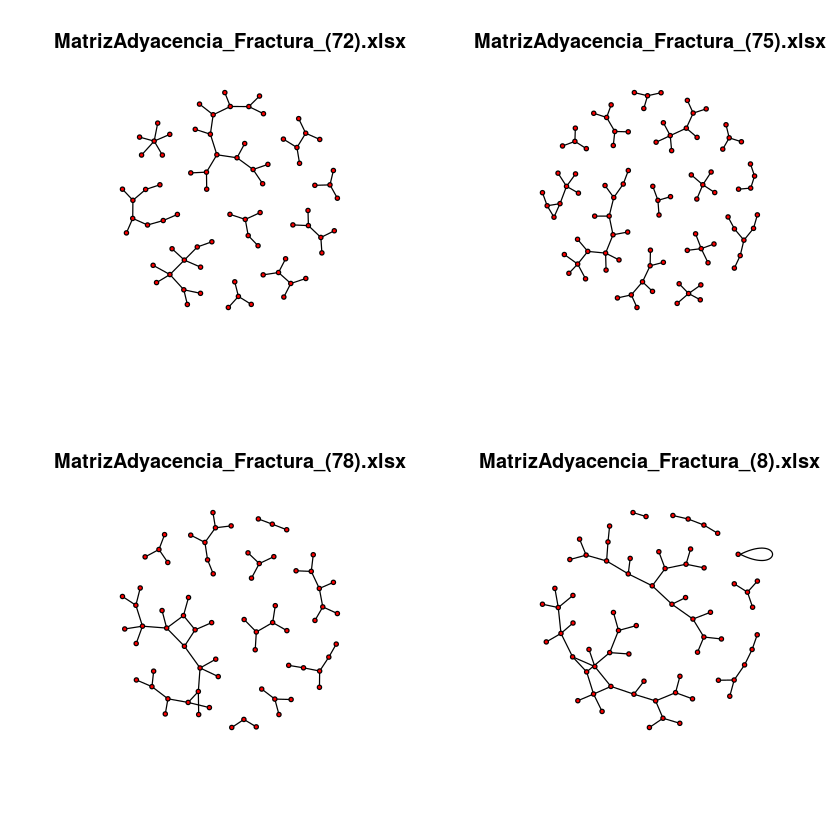

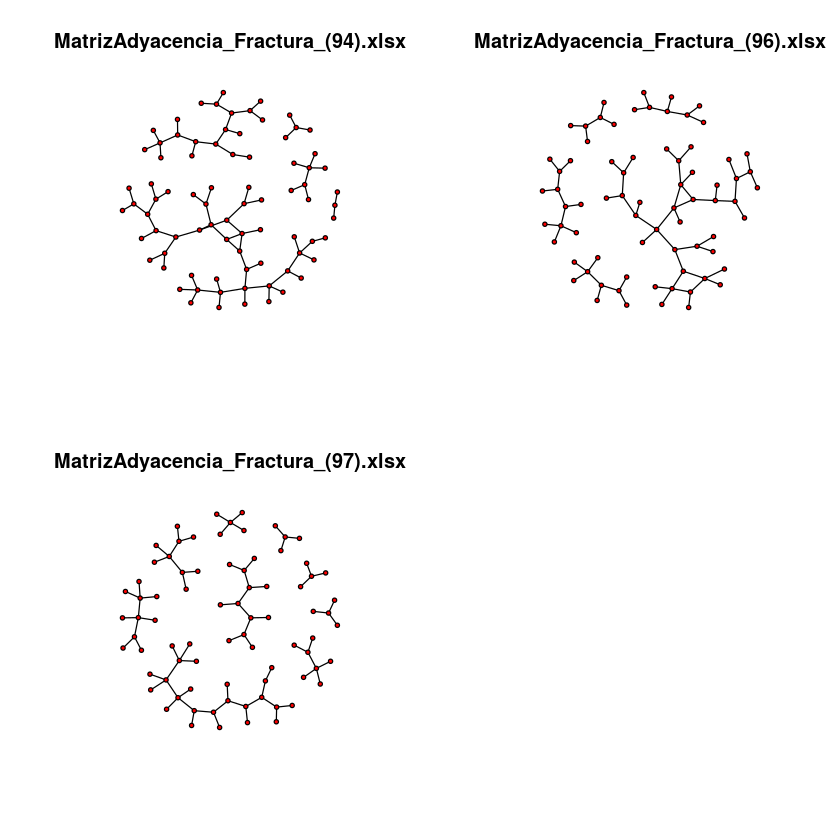

In [14]:
par(mfrow = c(2,2))
for (i in 1:length(matrices)){
    if (energy1(matrices[[i]][[1]])<=100){
        a<-as.matrix(matrices[[i]][[1]])
        graph=graph_from_adjacency_matrix(a,mode="undirected")
        plot.igraph(graph,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA,main=matrices[[i]][[2]]) 
    }
}

## GRÁFICAS CON ENERGÍA > 100

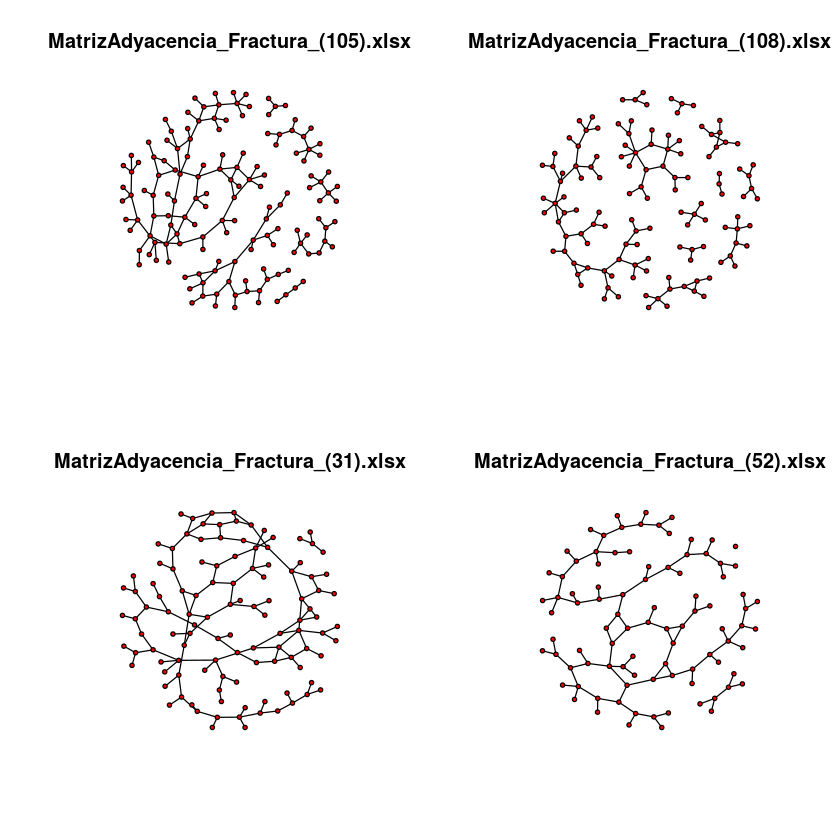

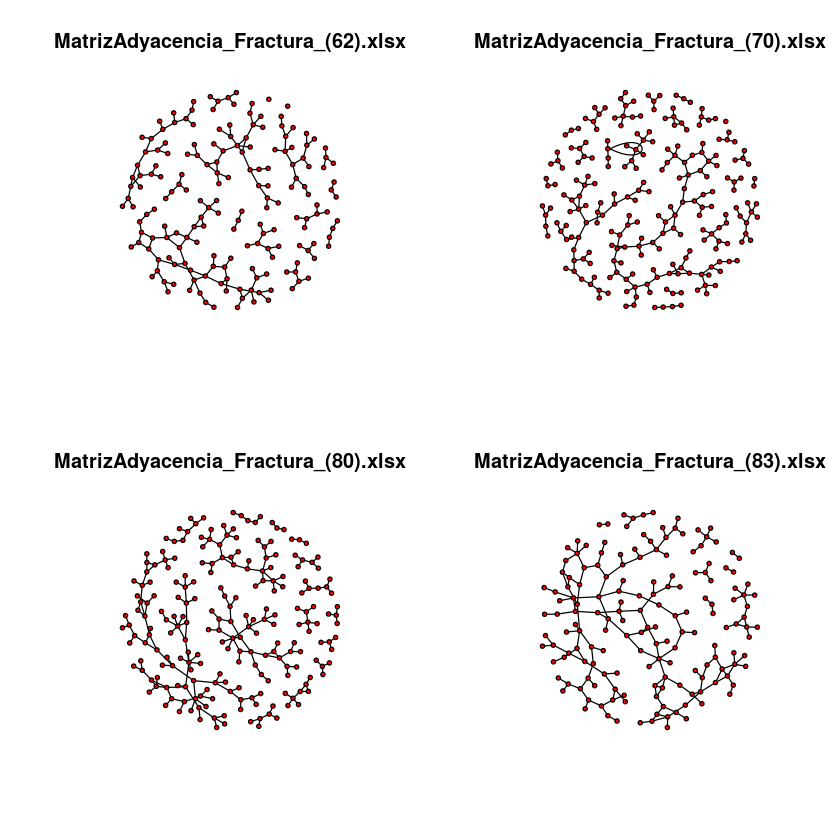

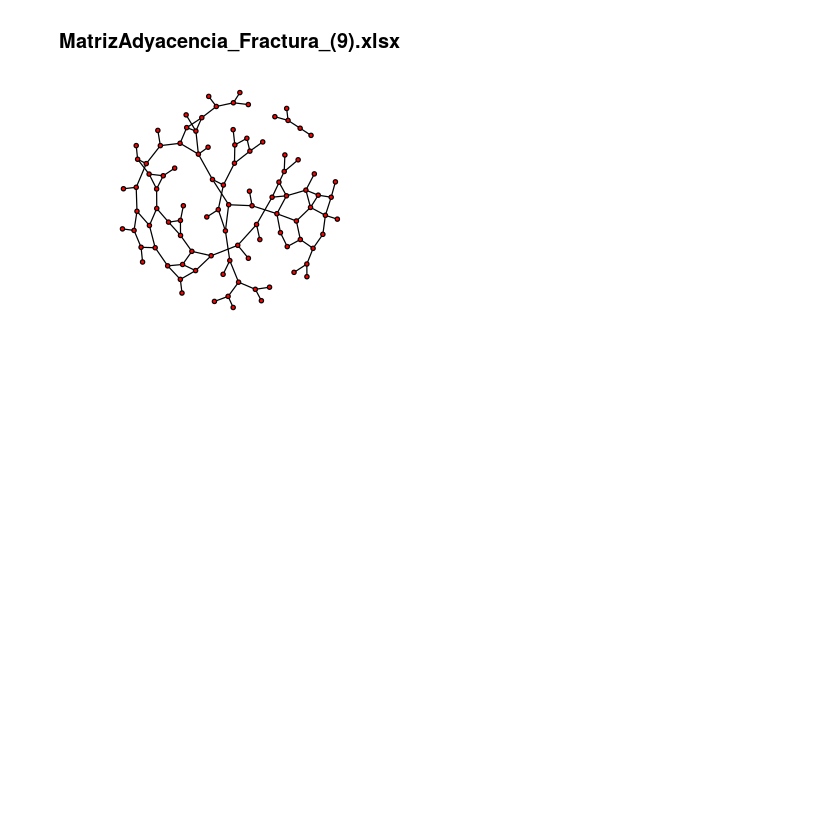

In [15]:
par(mfrow = c(2,2))
for (i in 1:length(matrices)){
    if (energy1(matrices[[i]][[1]])>100){
        a<-as.matrix(matrices[[i]][[1]])
        graph=graph_from_adjacency_matrix(a,mode="undirected")
        plot.igraph(graph,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA,main=matrices[[i]][[2]]) 
    }
}

## GENERANDO GRÁFICAS CON LAS ENERGIAS 


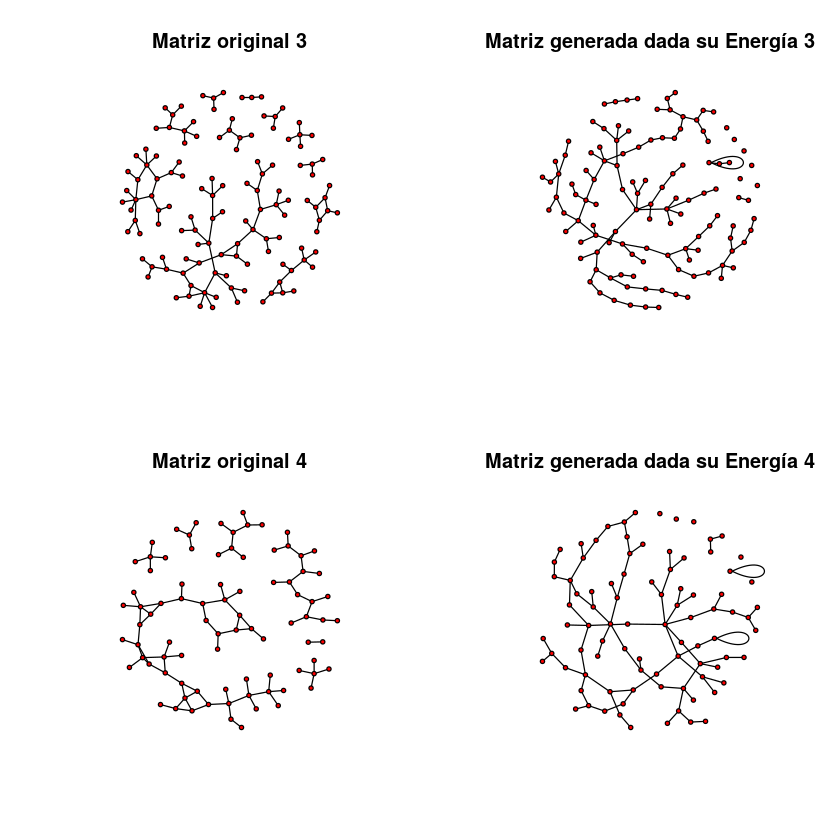

In [16]:
par(mfrow = c(2,2))
for(i in 3:4){
    e<-energy1(matrices[[i]][[1]])
    a<-as.matrix(matrices[[i]][[1]])
    b<-as.matrix(generator_e(e))
    graph=graph_from_adjacency_matrix(a,mode="undirected")
    graph1=graph_from_adjacency_matrix(b,mode="undirected")
    #plot.igraph(graph,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA,main=matrices[[i]][[2]])
    #plot.igraph(graph1,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA,main=paste("G",matrices[[i]][[2]])) 
    
    plot.igraph(graph,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA,main=paste("Matriz original",i))
    plot.igraph(graph1,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA,main=paste("Matriz generada dada su Energía",i)) 
    
}

## GRAFICAS GENERADAS POR EL GRADO PROMEDIO

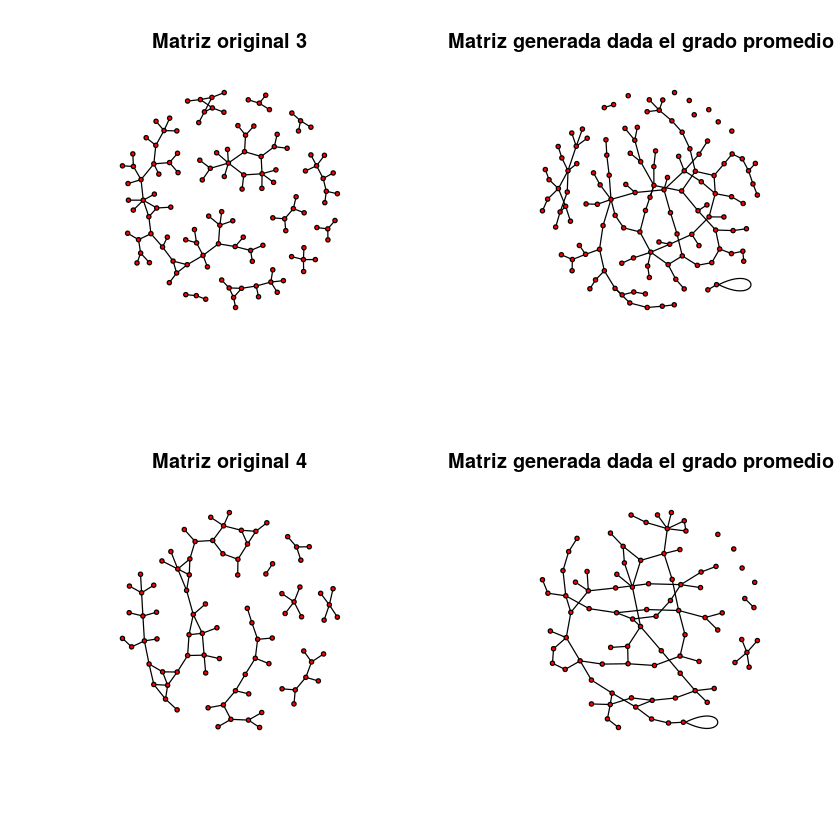

In [17]:
par(mfrow = c(2,2))
for(i in 3:4){
    g<-grado_prom(matrices[[i]][[1]])
    n<-length(matrices[[i]][[1]])
    a<-as.matrix(matrices[[i]][[1]])
    b<-as.matrix(generator_g(g,n))
    graph=graph_from_adjacency_matrix(a,mode="undirected")
    graph1=graph_from_adjacency_matrix(b,mode="undirected")
    #plot.igraph(graph,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA,main=matrices[[i]][[2]])
    #plot.igraph(graph1,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA,main=paste("GP",matrices[[i]][[2]])) 
    plot.igraph(graph,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA,main=paste("Matriz original",i))
    plot.igraph(graph1,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA,main=paste("Matriz generada dada el grado promedio",i)) 
    
}

## Experimento ERDÖS-RÉNYI

In [18]:
n<-50
Energías<-c()
Probabilidades<-c()
for(i in 1:100){
    p<-runif(1,0,1)
    g<-erdos.renyi.game(n,p)
    #plot.igraph(g,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA) 
    d<-get.adjacency(g)
    m<-as.matrix(d)
    m<-as.data.frame(m)
    Probabilidades[[i]]<-p
    Energías[[i]]<-energy1(m)
}
data.frame(Probabilidades,Energías)

Probabilidades,Energías
0.21251206,129.18142
0.87766795,142.26517
0.15131443,111.04033
0.07938909,80.17770
0.15810650,116.42228
0.53295389,173.26609
0.44147489,168.50153
0.09899604,97.46057
0.12309602,98.92413
0.25774123,137.08870


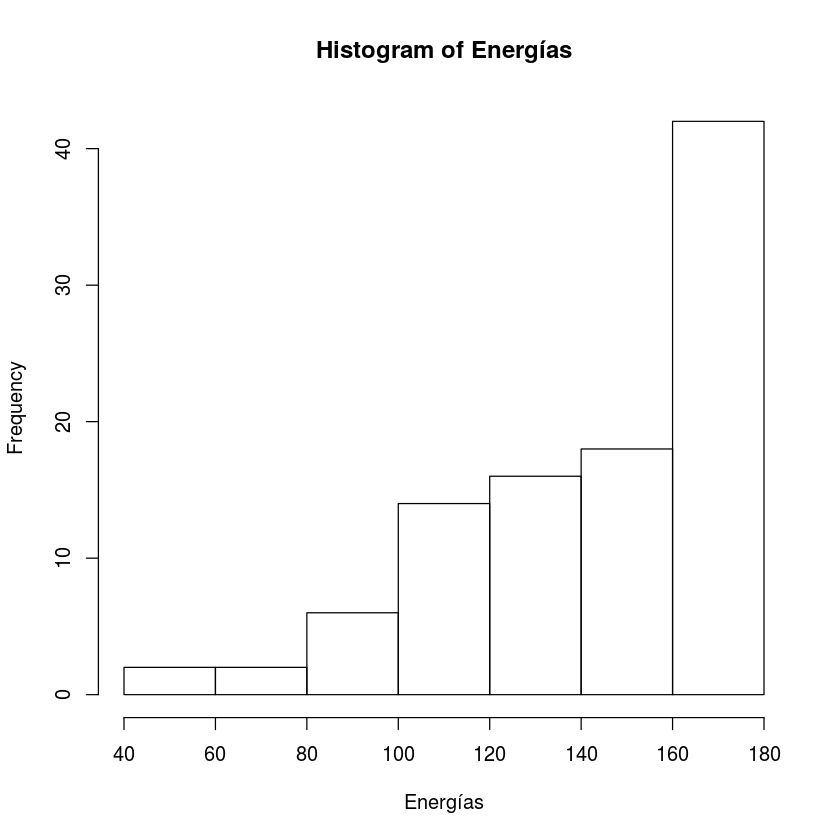

In [19]:
hist(Energías)

In [20]:
#par(mfrow = c(2,2))
for(i in 1:length(matrices)){
    #e<-energy1(matrices[[i]][[1]]) #Regresa energía de la matriz
    e<-grado_prom(matrices[[i]][[1]])
    a<-as.matrix(matrices[[i]][[1]])
    b<-as.matrix(generator_e(e))
    b<-as.data.frame(b)
    e1<-grado_prom(b)
    g<-grado_prom(matrices[[i]][[1]])
    p<-as.matrix(generator_g(g,length(matrices[[i]][[1]])))
    p<-as.data.frame(p)
    e2<-grado_prom(p)
    
    
    #graph=graph_from_adjacency_matrix(a,mode="undirected")
    #graph1=graph_from_adjacency_matrix(b,mode="undirected")
    #plot.igraph(graph,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA,main=matrices[[i]][[2]])
    #plot.igraph(graph1,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA,main=paste("G",matrices[[i]][[2]])) 
    
    #plot.igraph(graph,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA,main=paste("Matriz original",i))
    #plot.igraph(graph1,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA,main=paste("Matriz generada dada su Energía",i)) 
    cat(i,"&",e,"&",e1,"&",e2,"\\","\n")
    
}

1 & 2.054422 & 1.333333 & 2.068027 \ 
2 & 1.85 & 0.6666667 & 1.875 \ 
3 & 1.904 & 0.6666667 & 1.912 \ 
4 & 2.046512 & 1.333333 & 2.069767 \ 
5 & 1.896552 & 0.6666667 & 1.931034 \ 
6 & 2 & 1.333333 & 2.023256 \ 
7 & 1.943662 & 1 & 1.971831 \ 
8 & 2.247788 & 1 & 2.256637 \ 
9 & 1.924528 & 0.6666667 & 1.943396 \ 
10 & 2.043478 & 1.333333 & 2.054348 \ 
11 & 1.746032 & 0.6666667 & 1.777778 \ 
12 & 1.910112 & 0.6666667 & 1.921348 \ 
13 & 2.034483 & 1.333333 & 2.068966 \ 
14 & 1.837004 & 0.6666667 & 1.84141 \ 
15 & 1.733333 & 0.6666667 & 1.76 \ 
16 & 1.711111 & 1 & 1.733333 \ 
17 & 1.742857 & 0.6666667 & 1.757143 \ 
18 & 1.835821 & 0.6666667 & 1.865672 \ 
19 & 1.954545 & 0.6666667 & 1.963636 \ 
20 & 2.09697 & 1.333333 & 2.109091 \ 
21 & 2.306122 & 1 & 2.326531 \ 
22 & 1.925926 & 0.6666667 & 1.950617 \ 
23 & 1.917808 & 0.6666667 & 1.945205 \ 
24 & 1.772152 & 0.6666667 & 1.797468 \ 


In [21]:
length(matrices)

[1] 24

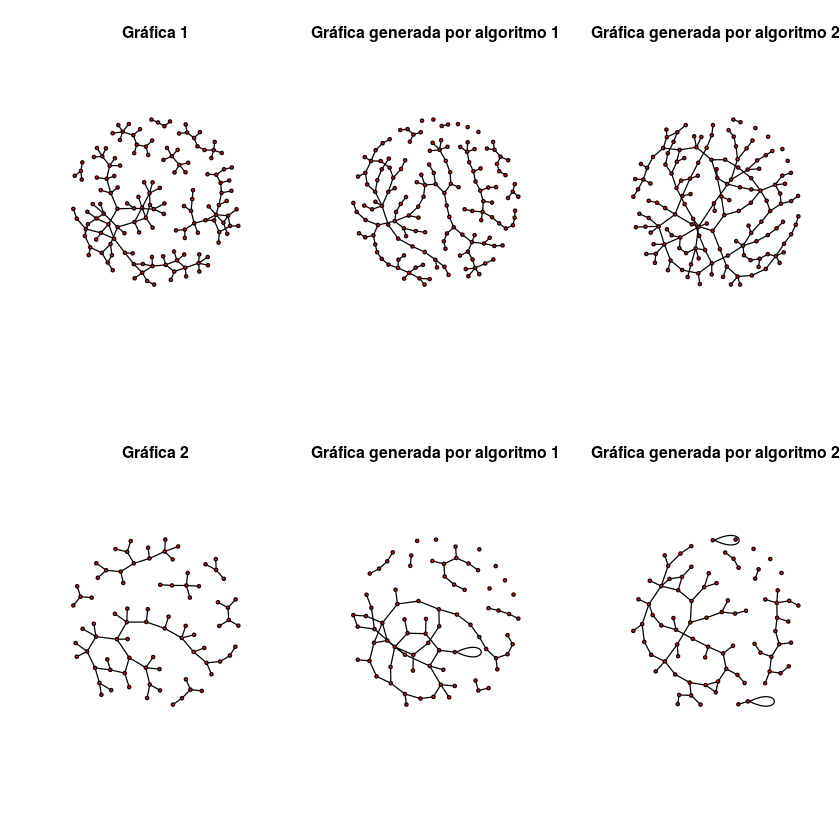

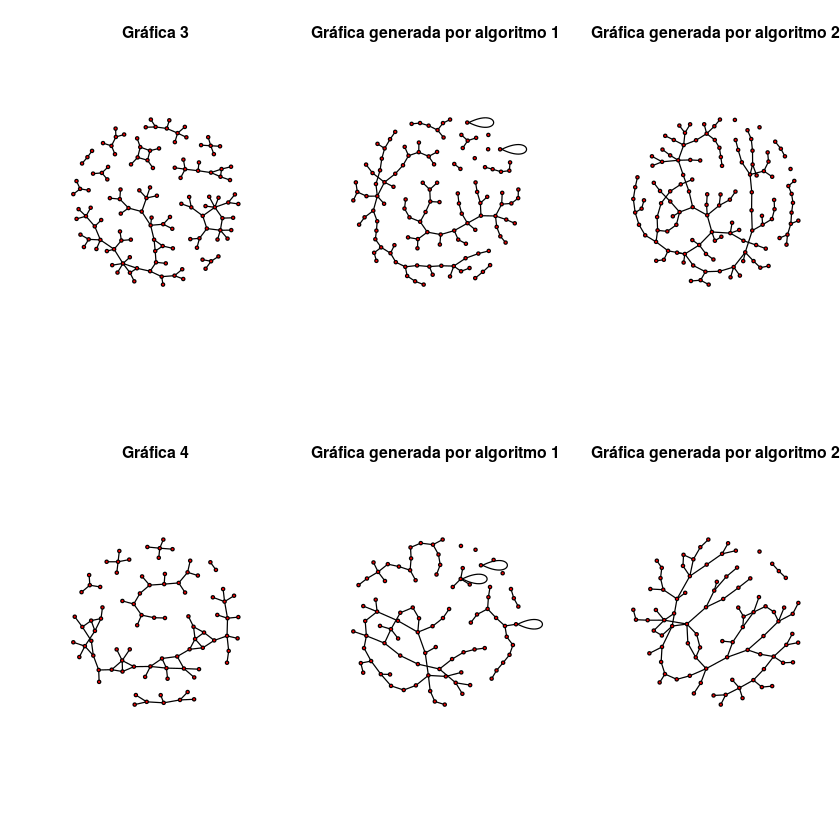

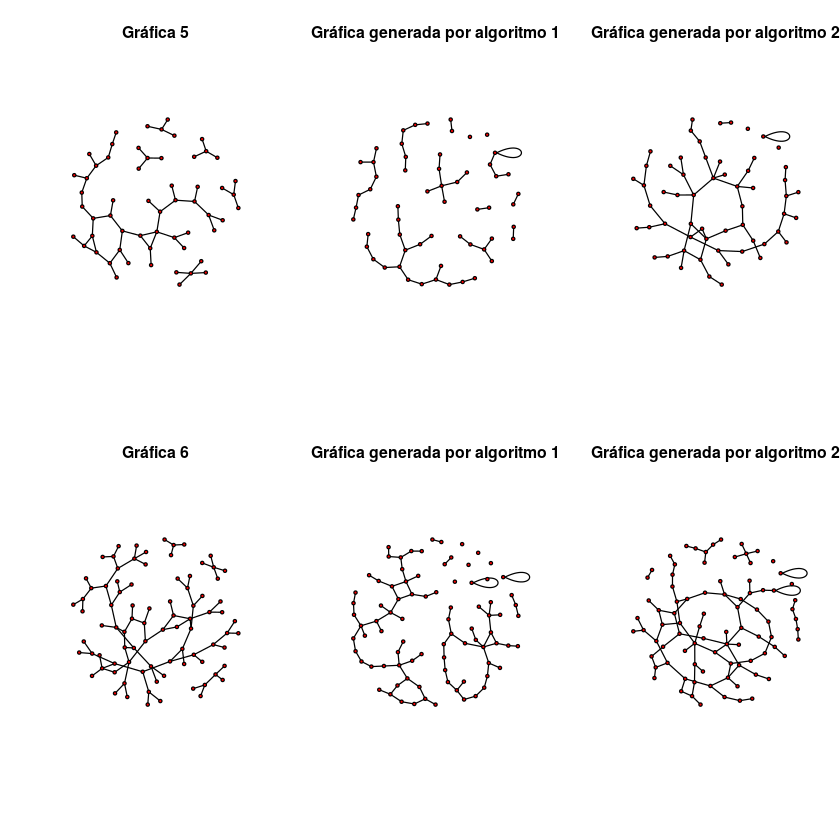

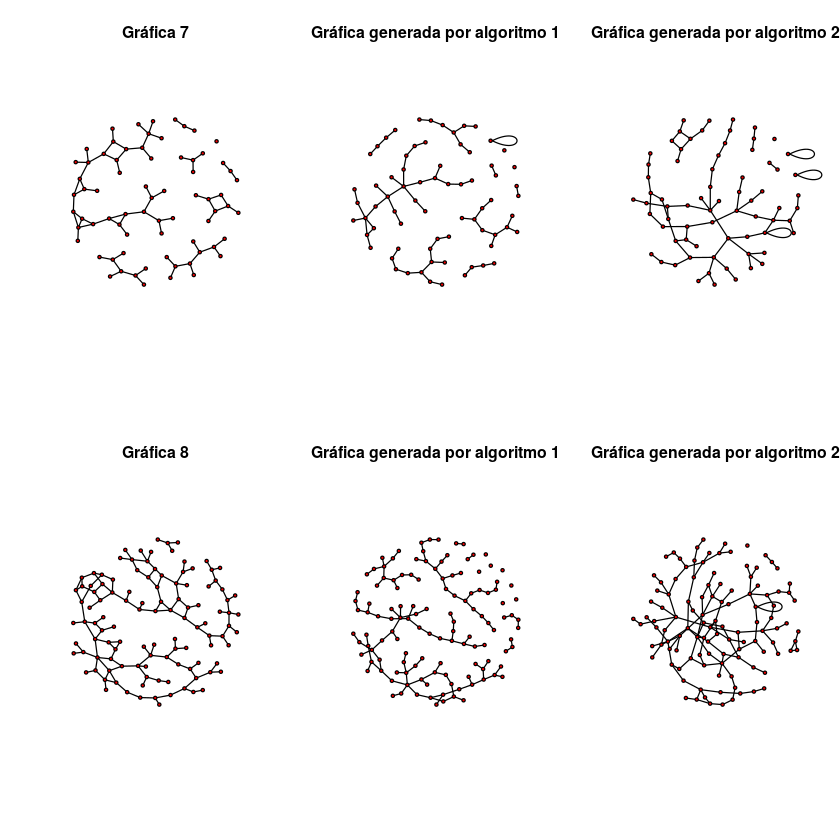

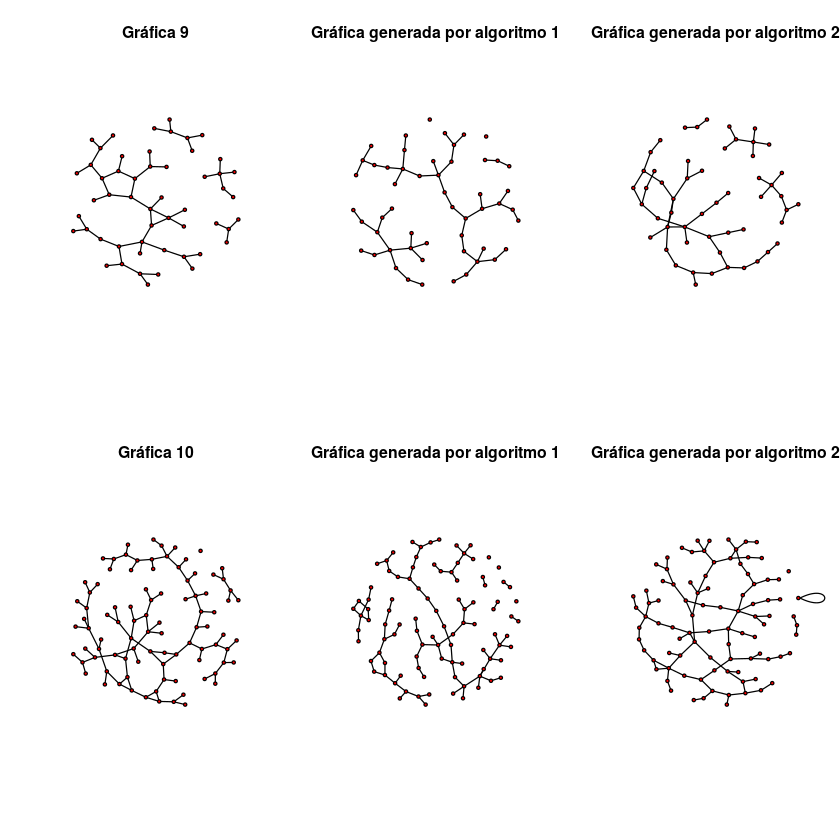

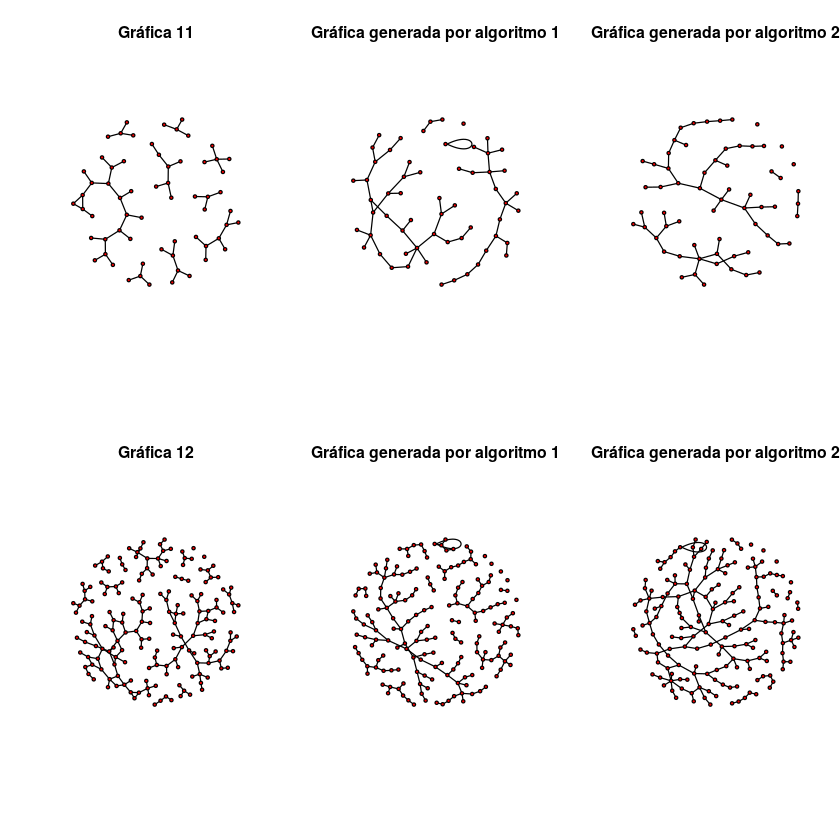

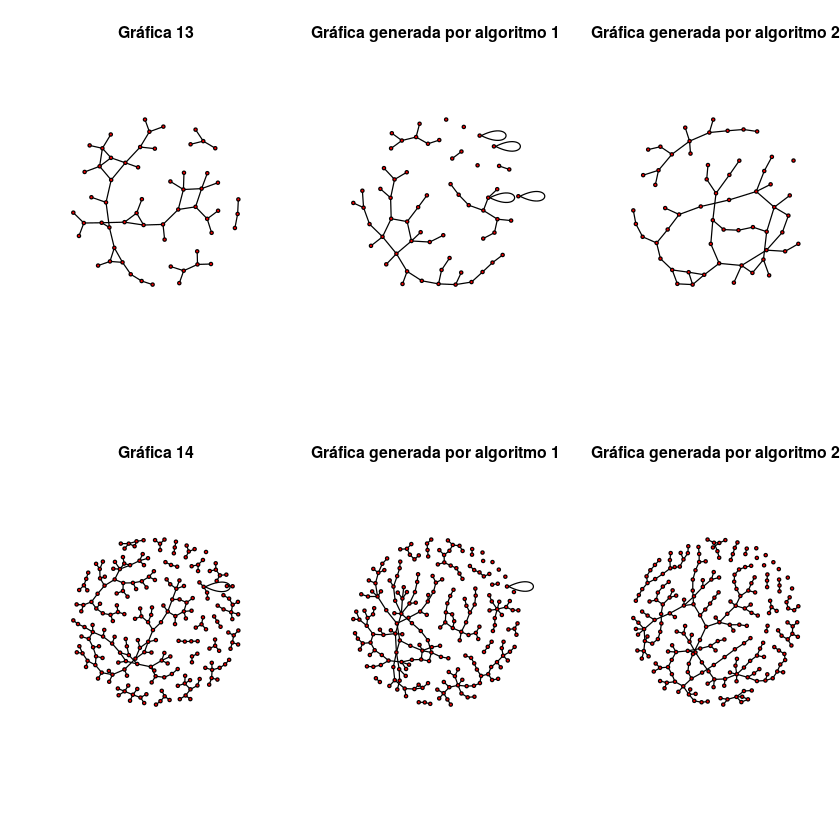

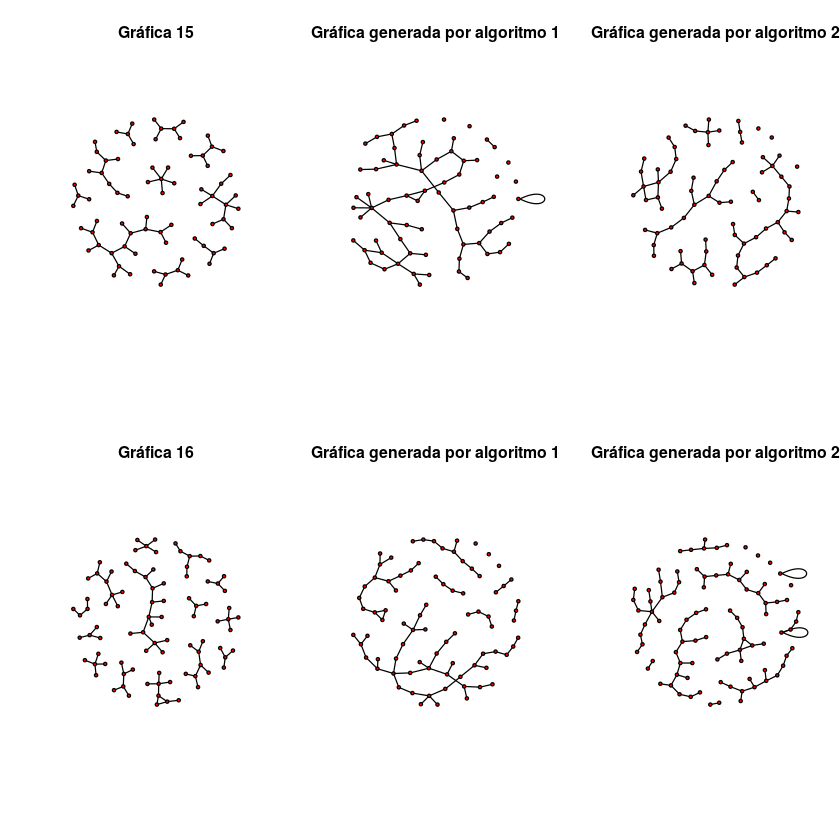

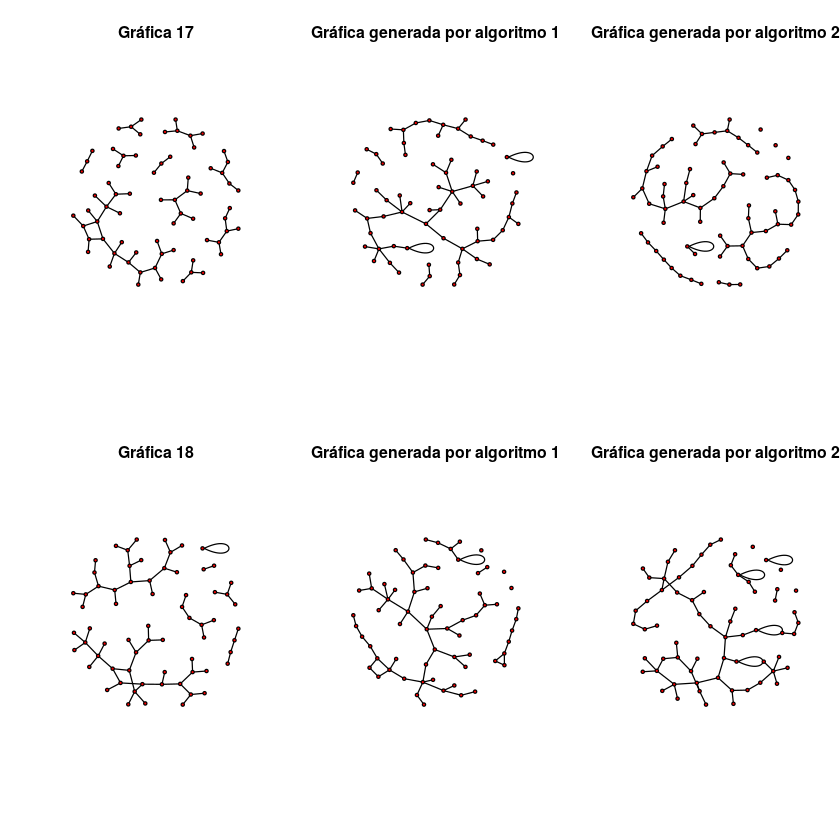

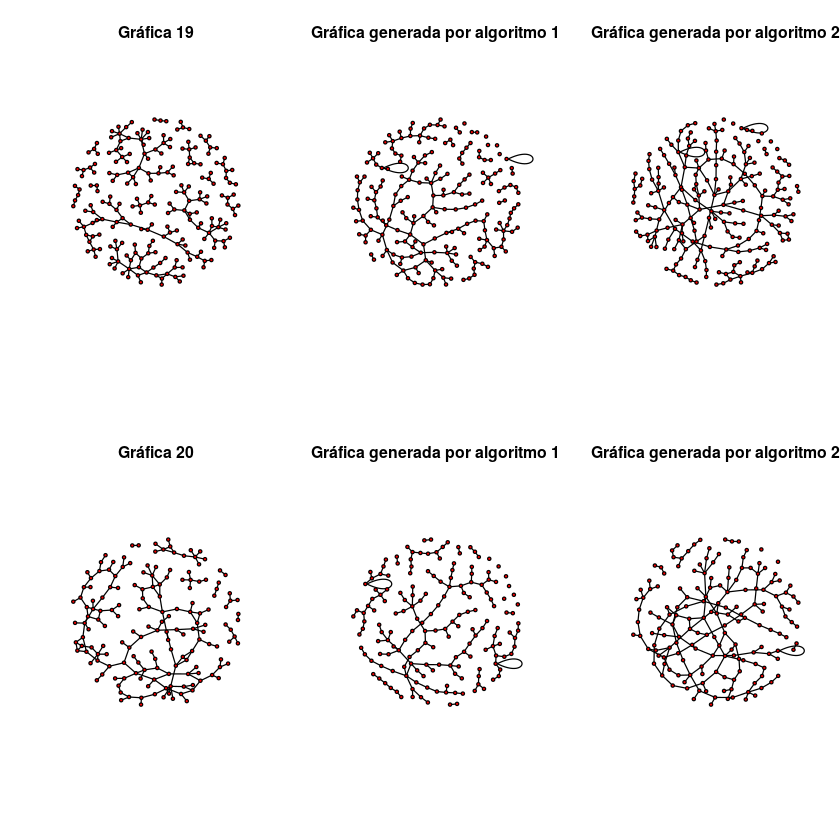

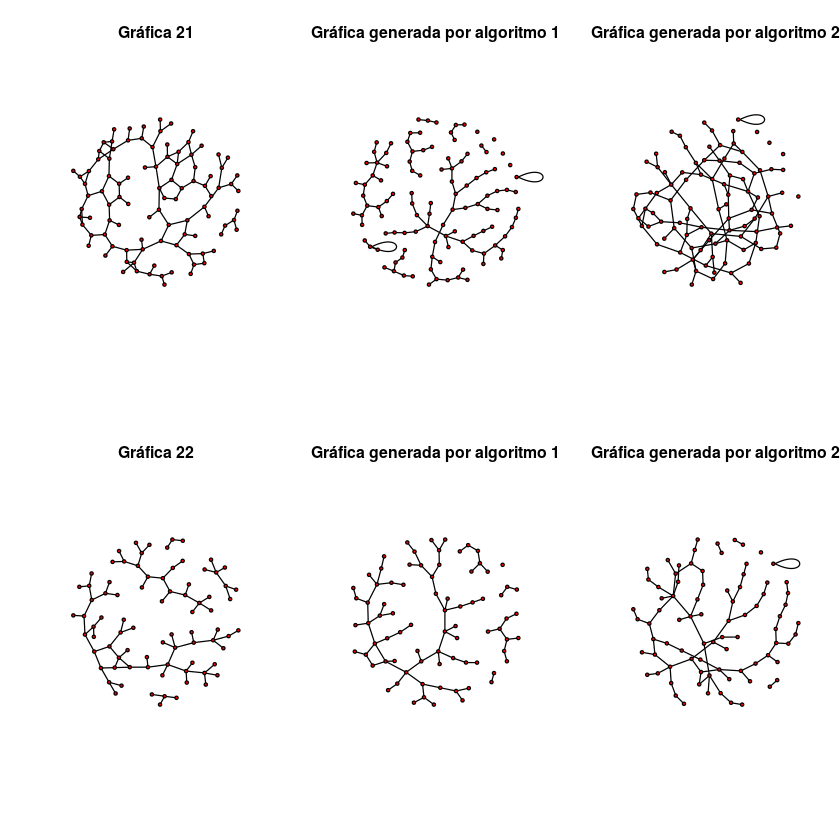

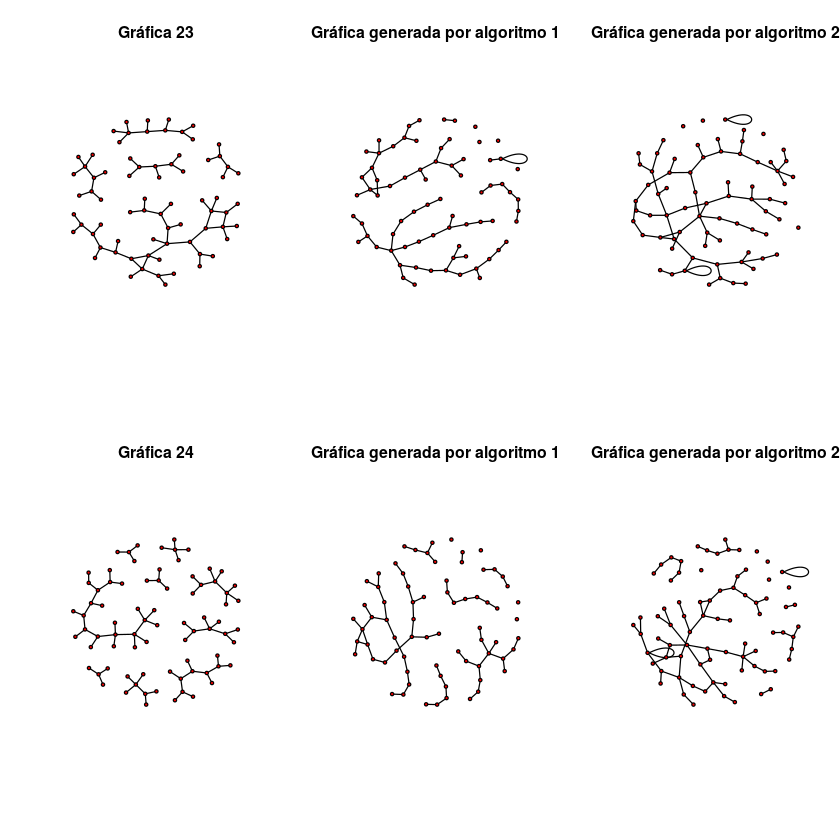

In [23]:
par(mfrow = c(2,3))
for(i in 1:length(matrices)){
    g<-grado_prom(matrices[[i]][[1]])
    e<-energy1(matrices[[i]][[1]]) #Regresa energía de la matriz
    n<-length(matrices[[i]][[1]])
    a<-as.matrix(matrices[[i]][[1]])
    b<-as.matrix(generator_e(e))
    c<-as.matrix(generator_g(g,n))
    graph=graph_from_adjacency_matrix(a,mode="undirected")
    graph1=graph_from_adjacency_matrix(b,mode="undirected")
    graph2=graph_from_adjacency_matrix(c,mode="undirected")
    #plot.igraph(graph,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA,main=matrices[[i]][[2]])
    #plot.igraph(graph1,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA,main=paste("GP",matrices[[i]][[2]])) 
    plot.igraph(graph,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA,main=paste("Gráfica",i))
    plot.igraph(graph1,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA,main=paste("Gráfica generada por algoritmo 1")) 
    plot.igraph(graph2,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA,main=paste("Gráfica generada por algoritmo 2")) 
}